### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import numpy as np



### Check if there are totally new users or new books in the test set

In [2]:
# Load the data
train = pd.read_csv('/kaggle/input/dis-project-2-recommender-systems-f2024/train.csv')
test = pd.read_csv('/kaggle/input/dis-project-2-recommender-systems-f2024/test.csv')

# Extract unique book_ids and user_ids from train and test data
train_books = set(train['book_id'].unique())
train_users = set(train['user_id'].unique())

test_books = set(test['book_id'].unique())
test_users = set(test['user_id'].unique())

# Check if all test books and users exist in the train set
missing_books = test_books - train_books
missing_users = test_users - train_users

# Display results
if missing_books:
    print(f"Missing book_ids in train data: {len(missing_books)}")
    print(f"Examples: {list(missing_books)[:10]}")
else:
    print("All book_ids in test data exist in train data.")

if missing_users:
    print(f"Missing user_ids in train data: {len(missing_users)}")
    print(f"Examples: {list(missing_users)[:10]}")
else:
    print("All user_ids in test data exist in train data.")


All book_ids in test data exist in train data.
All user_ids in test data exist in train data.


### User Rating distribution (New vs. Old)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

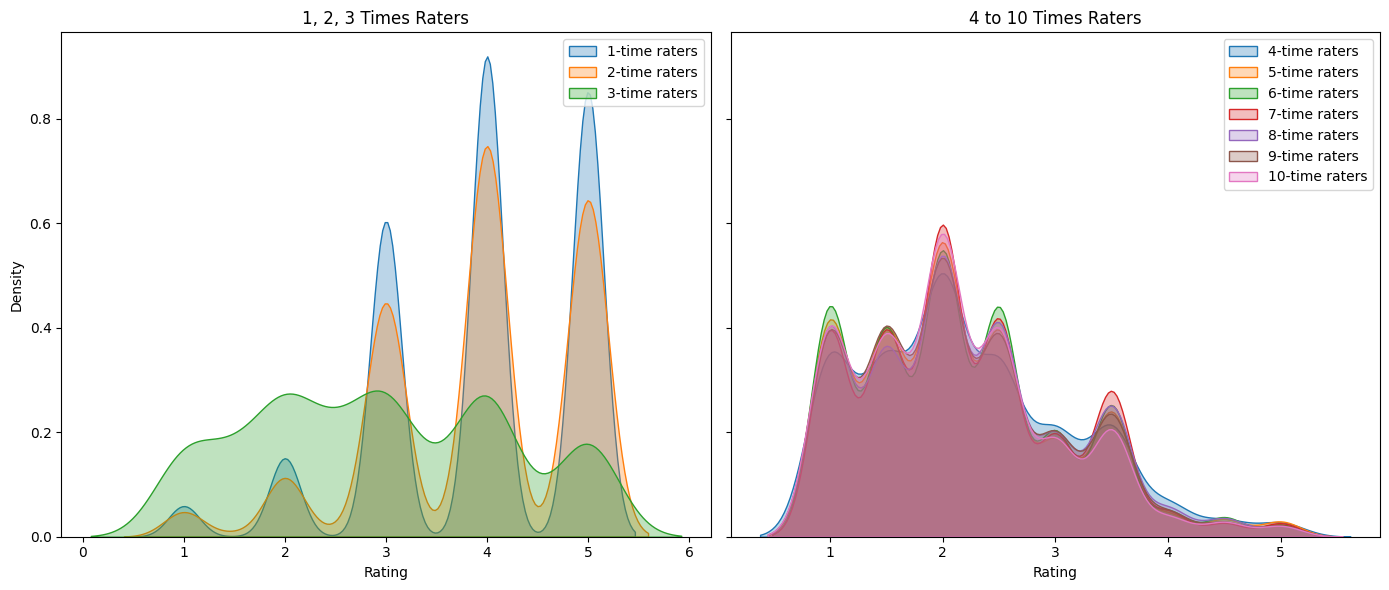

In [3]:
df = train 

# Count ratings per user
user_ratings_count = df['user_id'].value_counts()

# Map user rating counts to the main dataframe
df['user_ratings_count'] = df['user_id'].map(user_ratings_count)

# Subset: Users who rated between 1 and 10 times
subset = df[(df['user_ratings_count'] >= 1) & (df['user_ratings_count'] <= 10)]

# Group ratings by user rating count
grouped_ratings = {times: subset[subset['user_ratings_count'] == times]['rating'] for times in range(1, 11)}

# Create two panels: Panel 1 (1, 2, 3) and Panel 2 (4, 5, 6, 7, 8, 9, 10)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Panel 1: 1, 2, 3 times raters
for times in [1, 2, 3]:
    sns.kdeplot(grouped_ratings[times], ax=axes[0], label=f'{times}-time raters', fill=True, alpha=0.3)
axes[0].set_title('1, 2, 3 Times Raters')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Density')
axes[0].legend()

# Panel 2: 4, 5, 6, 7, 8, 9, 10 times raters
for times in [4, 5, 6, 7, 8, 9, 10]:
    sns.kdeplot(grouped_ratings[times], ax=axes[1], label=f'{times}-time raters', fill=True, alpha=0.3)
axes[1].set_title('4 to 10 Times Raters')
axes[1].set_xlabel('Rating')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


### Book Rating distribution (New vs. Old)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

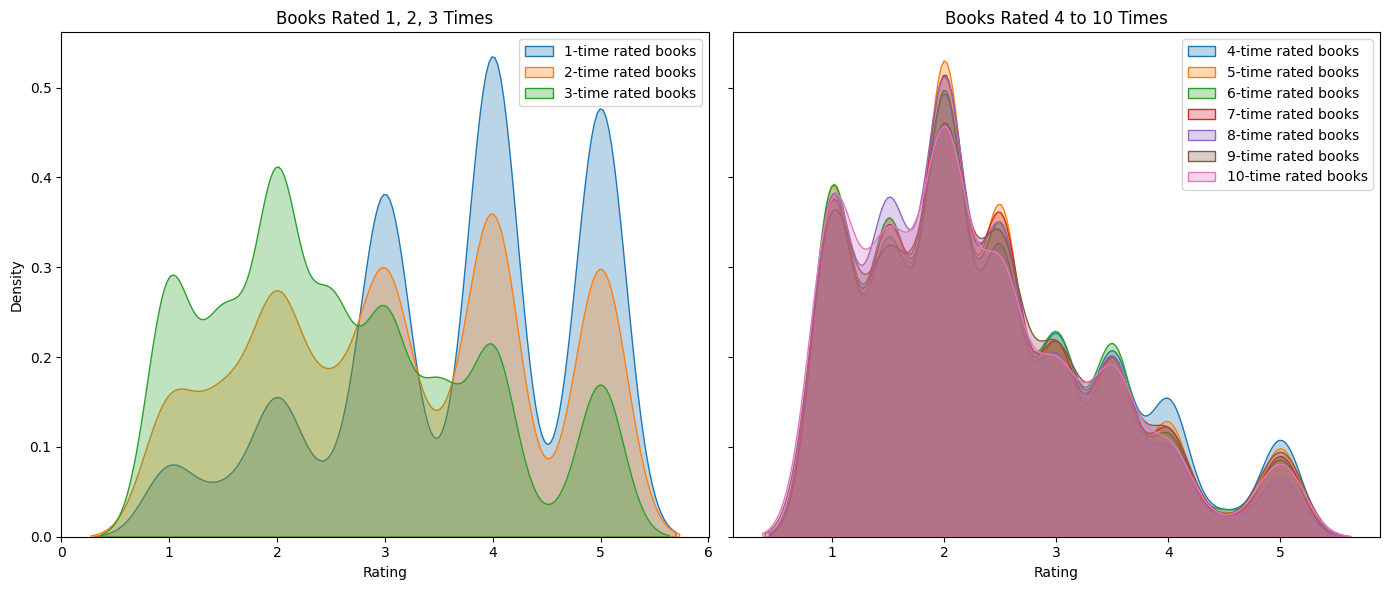

In [4]:
# Count ratings per book
book_ratings_count = df['book_id'].value_counts()

# Map book rating counts to the main dataframe
df['book_ratings_count'] = df['book_id'].map(book_ratings_count)

# Subset: Books rated between 1 and 10 times
subset = df[(df['book_ratings_count'] >= 1) & (df['book_ratings_count'] <= 10)]

# Group ratings by book rating count
grouped_ratings = {times: subset[subset['book_ratings_count'] == times]['rating'] for times in range(1, 11)}

# Create two panels: Panel 1 (1, 2, 3) and Panel 2 (4, 5, 6, 7, 8, 9, 10)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Panel 1: Books rated 1, 2, 3 times
for times in [1, 2, 3]:
    sns.kdeplot(grouped_ratings[times], ax=axes[0], label=f'{times}-time rated books', fill=True, alpha=0.3)
axes[0].set_title('Books Rated 1, 2, 3 Times')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Density')
axes[0].legend()

# Panel 2: Books rated 4, 5, 6, 7, 8, 9, 10 times
for times in [4, 5, 6, 7, 8, 9, 10]:
    sns.kdeplot(grouped_ratings[times], ax=axes[1], label=f'{times}-time rated books', fill=True, alpha=0.3)
axes[1].set_title('Books Rated 4 to 10 Times')
axes[1].set_xlabel('Rating')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


### Compare the books rated by new users and old users

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


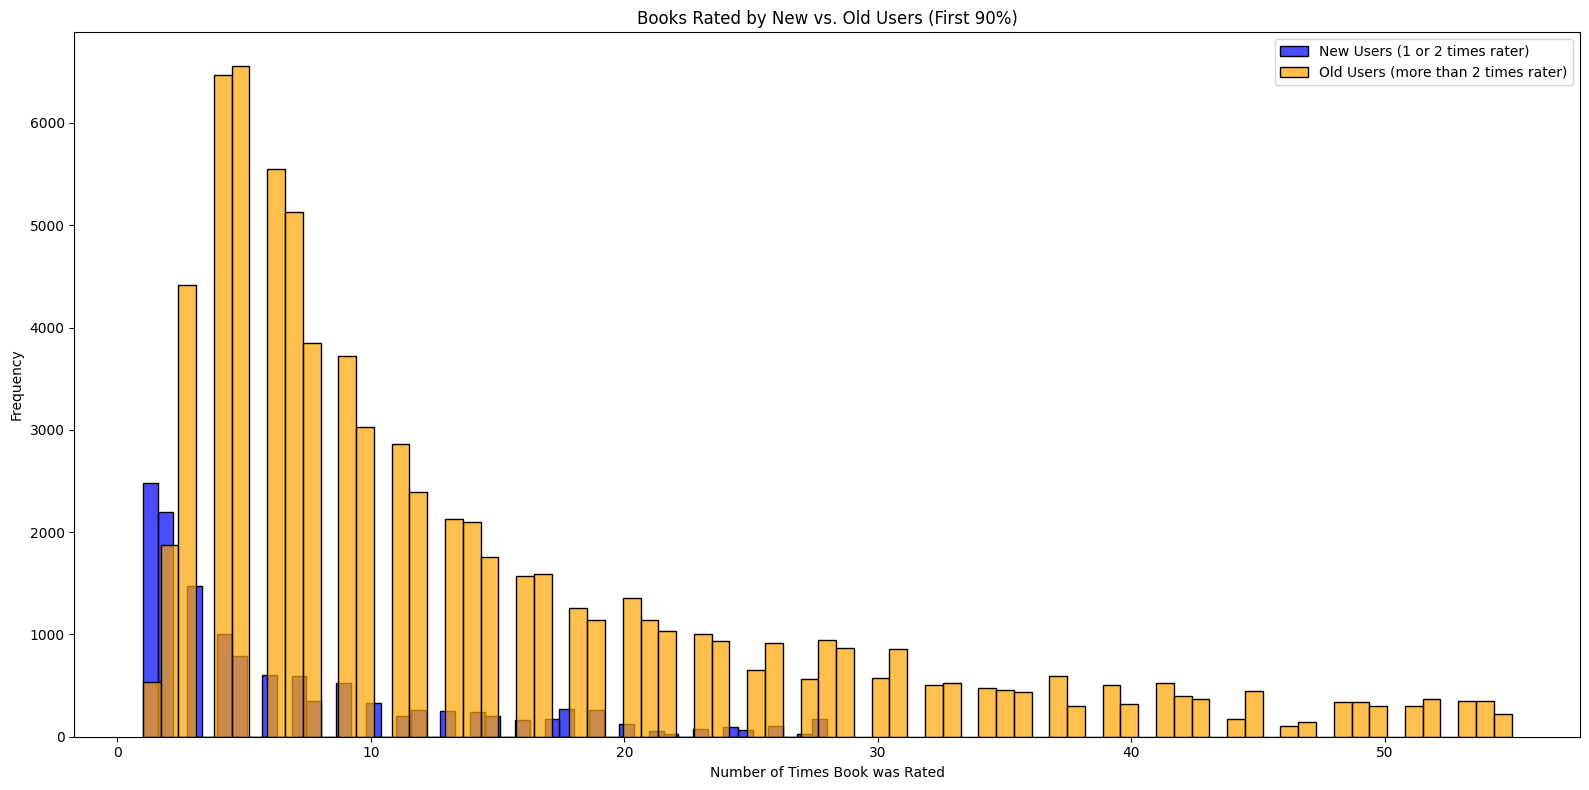

--- Books rated by new users (trimmed) ---
count    13123.000000
mean         6.588356
std          6.526932
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         28.000000
Name: book_ratings_count, dtype: float64

--- Books rated by other users (trimmed) ---
count    77660.000000
mean        14.475573
std         12.395610
min          1.000000
25%          5.000000
50%         10.000000
75%         20.000000
max         55.000000
Name: book_ratings_count, dtype: float64



In [12]:
# Define new users threshold
new_user_threshold = 2  # Define a threshold for new users
new_book_threshold = 2  # Define a threshold for new books

# Define new users
df['is_new_user'] = df['user_ratings_count'] <= new_user_threshold

# Split data by new vs. other users
books_rated_by_new_users = df[df['is_new_user']]['book_ratings_count']
books_rated_by_other_users = df[~df['is_new_user']]['book_ratings_count']

# Calculate 90th percentiles
books_rated_by_new_users_90th = books_rated_by_new_users.quantile(0.9)
books_rated_by_other_users_90th = books_rated_by_other_users.quantile(0.9)

# Trim data to the first 90%
books_rated_by_new_users_trimmed = books_rated_by_new_users[books_rated_by_new_users <= books_rated_by_new_users_90th]
books_rated_by_other_users_trimmed = books_rated_by_other_users[books_rated_by_other_users <= books_rated_by_other_users_90th]

# Plotting the distributions
plt.figure(figsize=(16, 8))

# Books rated by new vs. other users (trimmed)
plt.subplot(1, 1, 1)
sns.histplot(books_rated_by_new_users_trimmed, kde=False, color='blue', alpha=0.7, label='New Users (1 or 2 times rater)')
sns.histplot(books_rated_by_other_users_trimmed, kde=False, color='orange', alpha=0.7, label='Old Users (more than 2 times rater)')
plt.title('Books Rated by New vs. Old Users (First 90%)')
plt.xlabel('Number of Times Book was Rated')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics for the trimmed data
trimmed_summary_stats = {
    "Books rated by new users (trimmed)": books_rated_by_new_users_trimmed.describe(),
    "Books rated by other users (trimmed)": books_rated_by_other_users_trimmed.describe()
}

for comparison, stats in trimmed_summary_stats.items():
    print(f"--- {comparison} ---\n{stats}\n")


### Check the percentage of cold start cases in the test set

In [8]:
# Identify new users and new books from training data
new_users = user_ratings_count[user_ratings_count <= new_user_threshold].index.tolist()
new_books = book_ratings_count[book_ratings_count <= new_book_threshold].index.tolist()

# Classify rows in test data
test['is_new_user'] = test['user_id'].isin(new_users)
test['is_new_book'] = test['book_id'].isin(new_books)

# Define categories
def classify(row):
    if row['is_new_user'] and row['is_new_book']:
        return 'new user rates new book'
    elif row['is_new_user'] and not row['is_new_book']:
        return 'new user rates non-new book'
    elif not row['is_new_user'] and row['is_new_book']:
        return 'non-new user rates new book'
    else:
        return 'non-new user rates non-new book'

test['category'] = test.apply(classify, axis=1)

# Calculate percentages for each category
category_counts = test['category'].value_counts(normalize=True) * 100

# Display results
print("In the test set, percentage of each category:")
print(category_counts.to_string())


In the test set, percentage of each category:
category
non-new user rates non-new book    89.093200
non-new user rates new book         6.800150
new user rates non-new book         3.044233
new user rates new book             1.062417
